<a href="https://colab.research.google.com/github/chanchanuu/ybigtahw/blob/main/%EB%AA%A8%EB%8D%B8%EB%A7%81%EA%B3%BC%EC%A0%9Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np 

In [3]:
df = pd.read_csv('/content/drive/Shareddrives/[YBIGTA] Data Analytics Team (22-2)/주니어 교육세션 (21기)/4. 모델링/creditcard.csv')

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.drop('Time',axis =1, inplace = True)

In [12]:
# class imbalance 심함
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# train, test split

In [13]:
from sklearn.model_selection import train_test_split


X = df.drop('Class',axis = 1)
y = df[['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify = y)


In [21]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


# LGBM

Lgbm은 xgboost와 차이점은 xgboost는 level-wise방식인 것에 비해 lgbm은 leaf-wise 방식을 취했다는 점이다. lgbmdms xgboost의 장점을 포함함과 동시에 속도와 성능면에서도 우수하게 작동하는 모습을 보인다. 하지만 데이터의 수가 작다면 과적합의 문제가 있다고 한다.
class imbalance 문제를 해결하기 위해 scale_pos_weight를 사용했고, 이진 분류이기에 목적함수로 binary를 사용했다. 컬럼수가 많다고 생각하여 일단은 max_depth의 제한을 풀었지만 추가적인 조정이 필요할 것 같다. 

In [25]:
import matplotlib.pyplot as plt

In [26]:
def plot_roc_curve(y_train, y_test, train_pred, test_pred, train_prob, test_prob):
    from sklearn.metrics import roc_curve, roc_auc_score, f1_score, f1_score, accuracy_score, recall_score, precision_score
    
    fpr, tpr, thresholds = roc_curve(y_test, test_prob) # output 3개가 나오는데, 각 threshhold 마다의 fpr, tpr값 인듯
    
    train_f1 = f1_score(y_train, train_pred)
    test_f1 = f1_score(y_test, test_pred)
    
    train_recall = recall_score(y_train, train_pred)
    test_recall = recall_score(y_test, test_pred)
    
    train_pre = precision_score(y_train, train_pred)
    test_pre = precision_score(y_test, test_pred)  
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('test ROC : {}'.format(round(roc_auc_score(y_test, test_prob),3)),fontsize=16)
    plt.legend()
    plt.show()
    print('train_f1 score: ',train_f1)
    print('test_f1 score: ',test_f1,'\n')
    
    print('train_recall score: ',train_recall)
    print('test_recall score: ',test_recall,'\n')

    print('train_pre score: ',train_pre)
    print('test_pre score: ',test_pre,'\n')
    
    print('train acc score: ',train_acc)
    print('test acc score: ',test_acc, '\n')

In [14]:
def confusion_matrix(y_test, test_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for (y, pred) in zip(y_test, test_pred):
        if y == 1 and pred==1:
            TP+=1
        elif y==0 and pred==1:
            FP+=1
        elif y == 0 and pred==0:
            TN+=1
        elif y==1 and pred==0:
            FN+=1
    
    print('     y_true') 
    print('pred',[TP, TN],'\n    ',[FN,FP])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 30 rounds.
[5]	valid_0's binary_logloss: 0.491723
[10]	valid_0's binary_logloss: 0.360385
[15]	valid_0's binary_logloss: 0.269453
[20]	valid_0's binary_logloss: 0.204232
[25]	valid_0's binary_logloss: 0.156364
[30]	valid_0's binary_logloss: 0.120719
[35]	valid_0's binary_logloss: 0.0938601
[40]	valid_0's binary_logloss: 0.0734503
[45]	valid_0's binary_logloss: 0.057851
[50]	valid_0's binary_logloss: 0.0458723
[55]	valid_0's binary_logloss: 0.0366473
[60]	valid_0's binary_logloss: 0.0294568
[65]	valid_0's binary_logloss: 0.0238721
[70]	valid_0's binary_logloss: 0.019526
[75]	valid_0's binary_logloss: 0.0160993
[80]	valid_0's binary_logloss: 0.0134096
[85]	valid_0's binary_logloss: 0.0112887
[90]	valid_0's binary_logloss: 0.00960934
[95]	valid_0's binary_logloss: 0.00796523
[100]	valid_0's binary_logloss: 0.0068215
[105]	valid_0's binary_logloss: 0.00594732
[110]	valid_0's binary_logloss: 0.00528549
[115]	valid_0's binary_logloss: 0.0047

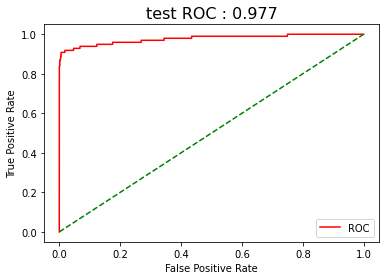

train_f1 score:  0.9936948297604036
test_f1 score:  0.8465608465608465 

train_recall score:  1.0
test_recall score:  0.8163265306122449 

train_pre score:  0.9874686716791979
test_pre score:  0.8791208791208791 

train acc score:  0.9999780552568632
test acc score:  0.9994908886626171 

---18.75698971748352 seconds ---


In [71]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, f1_score, accuracy_score, recall_score, precision_score


import os
import time

# pos 8.2 & lr 0.08하면 더 좋음

start_time=time.time()


model = LGBMClassifier(scale_pos_weight=20,
                       learning_rate=0.05, 
                       num_iterations = 1000, # n_estimator 랑 같은 것 같음
                       max_depth = -1,
                       n_jobs=-1,
                       boost_from_average=False,
                       objective = 'binary')

trained_model = model.fit(X_train, y_train, 
          eval_set=[(X_test,y_test)],
          early_stopping_rounds=30, 
          verbose = 5,
          eval_metric = 'f1')

train_pred = trained_model.predict(X_train)
train_prob = trained_model.predict_proba(X_train)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train, y_test, train_pred, test_pred, train_prob, test_prob)
#confusion_matrix(y_test, test_pred)
print("---%s seconds ---" % (time.time() - start_time))

XGboost

xgboost는 앙상블 부스팅 기법의 한 종류이고, 이전 모델에서의 실제값과 로스를 훈련데이터에 투입하여 오류를 보완하는 방식으로 작동한다. 세가지 모델 중 가장 학습 시간이 오래 소요되었다. 
파라미터는 대부분 default 값을 사용하였고, 학습률이나 depth를 수정하는 식으로 학습을 진행하였으며 이진 분류이기에 binary:logistic을 사용했고 clss imbalance를 해결하기 위해 scale pos weight 파라미터를 사용하였다.

In [33]:
from xgboost import plot_importance, XGBClassifier


In [34]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy, precision, recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1, roc_score))

In [43]:
xgb = XGBClassifier(n_estimators=300, learning_rate = 0.1, max_depth = 10, objective='binary:logistic',scale_pos_weight=20)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
metrics(y_test, xgb_pred)

정확도 : 1.00, 정밀도 : 0.91, 재현율 : 0.82
f1-score : 0.86, auc : 0.91


# Descision Tree

의사결정트리는 일련의 분류 규칙을 통해 데이터를 분류하는 모델이다. 의사결정트리는 이해하기쉽고, 스케일링이 필요없으며, 처리하기 까다로운 범주형 변수 역시 쉽게 처리가능하다는 장점이 있다. 하지만 다른 모델에 비해 좋은 성능을 보이지 못하며, 트리 구조가 복잡해지면 과적합의 문제가 존재한다는 점이 단점이다. 
파라미터로는 가장 중요한 max_depth를 조절하였고, 5일 때 가장 좋은 f1 score를 보이는 것을 확인했다.

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
tree_clf = DecisionTreeClassifier(max_depth= 5)
tree_clf.fit(X_train,y_train)
dt_pred = tree_clf.predict(X_test)

In [70]:
metrics(y_test, dt_pred)

정확도 : 1.00, 정밀도 : 0.91, 재현율 : 0.80
f1-score : 0.85, auc : 0.90
